참고문헌 : Pytel 외 저, 이주성 외 역, 재료역학, 2판, 한티미디어, 2013.<br>Ref: Pytel, Kiusalaas, Sharma, Mechanics of Materials, 2nd Ed., Cengege Learning, 2013.

`python` 기능을 확장해 주는 `module`을 불러 들임 (일부 기능만 사용될 수도 있음)

In [1]:
import numpy as np  # 배열, 행렬 관련 기능
import numpy.linalg as na  # 선형대수 (벡터, 행렬) 관련 기능
import matplotlib.pyplot as plt  # 그래프 관련 기능
import scipy.integrate as si  # 적분 관련 기능
import sympy as sy  # 기호 연산 기능
import sympy.plotting as splot
import IPython.display as disp  # 웹페이지 표시 기능
sy.init_printing()  # 기호 연산 결과 표시 기능 준비

## 예제 07.008<br>ex07.008

부정정보: 중첩법<br>Statically Indeterminate Beam : Superposition

p. 314

### 문제에서 주어진 변수<br>Given Parameters

#### 보의 길이<br>Length of the beam

In [2]:
L_AB_m = sy.symbols('L_AB_m', real=True, nonnegative=True)

s_d = {
    L_AB_m: 10,
}


#### 하중<br>Load

In [3]:
w0_N_m = sy.symbols('w0_N_m', real=True)

s_d.update(
    {
        w0_N_m: -1,
    }
)


#### 재료와 단면 특성<br>Material & section properties

In [4]:
E_Pa, I_m4 = sy.symbols('E_Pa, I_m4', positive=True)

s_d.update(
    {
        E_Pa: 200e9,
        I_m4: 20e6 * (1e-3) ** 4,
    }
)


#### 자유물체도<br>Free body diagram

In [5]:
x_m = sy.symbols('x_m', nonnegative=True)
x_A_m = 0
x_B_m = L_AB_m


### 아직 알지 못하는 반력<br>Reaction forces unknown yet

In [6]:
R_A_N, M_A_Nm, R_B_N = sy.symbols('R_A_N, M_A_Nm, R_B_N', real=True)

### 중첩법<br>Superposition

#### 외팔보 전체에 가해지는 분포하중 $w_0$에 의한 끝점의 처짐<br>Deflection of a cantilever's end point by distributed load $w_0$ over the whole length

p. 279 Table 6.2

$$
\delta_{Bw_0} = \frac{w_0L^4}{8EI}
$$

In [7]:
delta_Bw0_m = (w0_N_m * L_AB_m ** 4 / (8 * E_Pa * I_m4))

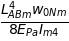

In [8]:
delta_Bw0_m

#### 외팔보 $L$ 지점에 가해지는 반력 $R$에 의한 끝점의 처짐<br>Deflection of a cantilever's end point by reaction force $R$ at $L$

p. 279 Table 6.2

$$
\delta_{BR} = \frac{RL^3}{3EI}
$$

In [9]:
delta_BR_m = (R_B_N * L_AB_m ** 3 / (3 * E_Pa * I_m4))

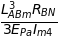

In [10]:
delta_BR_m

#### 두 처짐을 중첩함<br>Superpose two $\delta$'s

In [11]:
super_eq = sy.Eq(delta_Bw0_m + delta_BR_m, 0)

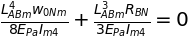

In [12]:
super_eq

#### $R$에 관하여 풂<br>Solve for $R$

In [13]:
R_B_N_sol = sy.solve(super_eq, R_B_N)[0]

In [14]:
R_B_N_sol

### 평형방정식<br>Equilibrium equation

수직방향<br>Vertical direction

$$
R_A + R_B + w_0 L = 0
$$

In [15]:
fy_eq = sy.Eq(R_A_N + R_B_N + w0_N_m * L_AB_m)

In [16]:
fy_eq

In [17]:
fy_eq.subs(R_B_N, R_B_N_sol)

In [18]:
R_A_N_sol = sy.solve(fy_eq.subs(R_B_N, R_B_N_sol), R_A_N)[0]

In [19]:
R_A_N_sol

$B$점 중심 회전방향<br>Rotation direction around $B$

$$
M_A - R_A \cdot L - P_N \cdot (L - a)=0
$$

In [20]:
m_eq = sy.Eq(M_A_Nm - R_A_N * L_AB_m - sy.Rational(1, 2) * w0_N_m * L_AB_m ** 2)

In [21]:
m_eq

In [22]:
sy.simplify(m_eq.subs(R_A_N, R_A_N_sol))

In [23]:
M_A_Nm_sol = sy.solve(m_eq.subs(R_A_N, R_A_N_sol), M_A_Nm)[0]

In [24]:
sy.simplify(M_A_Nm_sol)